In [97]:
# Load pandas
import pandas as pd

# Read CSV file into DataFrame df
df = pd.read_csv('2022_02_08-02_30_31_AM.csv', index_col=0)

# Show dataframe
print(df.head())

                                     price_string price_string_unf  \
uuid                                                                 
638744a4-b0ae-4166-8cb6-5c063c862036          NaN              NaN   
ab313969-02cc-48b2-9daf-0054efb70b92          NaN              NaN   
acbd66ff-79f8-467a-91f9-108a45af5626       $19.95              NaN   
963915d6-b2e3-4098-b242-9410593cf205       $92.00              NaN   
b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf        11.50              NaN   

                                                                           product_type  \
uuid                                                                                      
638744a4-b0ae-4166-8cb6-5c063c862036                           TGFwdG9wIENvdmVycy9CYWdz   
ab313969-02cc-48b2-9daf-0054efb70b92                        QmFraW5nIEN1cHMgYW5kIE1hdHM   
acbd66ff-79f8-467a-91f9-108a45af5626  R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...   
963915d6-b2e3-4098-b242-9410593cf205                  

In [78]:
#1. Products without prices
df_price=df[df['price_string'].isnull()]
print(df_price) # null price_string cols

                                     price_string price_string_unf  \
uuid                                                                 
638744a4-b0ae-4166-8cb6-5c063c862036          NaN              NaN   
ab313969-02cc-48b2-9daf-0054efb70b92          NaN              NaN   
389d9f75-cc3f-4bd2-94f7-93e381a3bed5          NaN              NaN   
1f2766ec-0a27-43f8-b28b-77a44492ead1          NaN              NaN   
7bad39f5-74b9-4611-afb9-46fb135190cd          NaN              NaN   
...                                           ...              ...   
8d763911-79b7-402d-8964-6bfe89692c66          NaN              NaN   
2dc182aa-d591-49e4-85d1-5c4a60a09664          NaN              NaN   
2a13338e-9268-4f7b-9e7c-b8c41c72971b          NaN              NaN   
679f073a-862a-4e43-b5ce-41e45afd3bfa          NaN              NaN   
25677eee-c26b-4abf-bd10-ca77a800ba26          NaN              NaN   

                                                             product_type  \
uuid        

In [79]:
#Count of products without prices and with prices in each Product Type, Category, Level 1
df_price=df[df['price_string'].isnull()]
print(df_price.count()) # null price_string cols
# print(df_price['price_string'])

price_string              0
price_string_unf      70000
product_type        8210000
level_1             8180000
category            8210000
dtype: int64
uuid
638744a4-b0ae-4166-8cb6-5c063c862036    NaN
ab313969-02cc-48b2-9daf-0054efb70b92    NaN
389d9f75-cc3f-4bd2-94f7-93e381a3bed5    NaN
1f2766ec-0a27-43f8-b28b-77a44492ead1    NaN
7bad39f5-74b9-4611-afb9-46fb135190cd    NaN
                                       ... 
8d763911-79b7-402d-8964-6bfe89692c66    NaN
2dc182aa-d591-49e4-85d1-5c4a60a09664    NaN
2a13338e-9268-4f7b-9e7c-b8c41c72971b    NaN
679f073a-862a-4e43-b5ce-41e45afd3bfa    NaN
25677eee-c26b-4abf-bd10-ca77a800ba26    NaN
Name: price_string, Length: 8220000, dtype: object


In [80]:
#Count of products without prices and with prices in each Product Type, Category, Level 1
df_price=df[df['price_string'].notna()]
print(df_price.count()) # not null price_string cols

price_string        5510000
price_string_unf     240000
product_type        5510000
level_1             5500000
category            5510000
dtype: int64


In [81]:
# get all categories of a category type column
c=df["category"].unique()
print(c)

['RWxlY3Ryb25pY3M' 'a2l0Y2hpbmcgYW5kIGRpbmluZw' 'SGVhbHRo'
 'YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl' 'Z3JvY2VyaWVz'
 'SG91c2Vob2xkIGFuZCBDbGVhbmluZw' 'Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz'
 'VG95cyBhbmQgR2FtZXM' 'QXJ0IHN1cHBsaWVz' 'cGV0IHN1cHBsaWVz'
 'VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ' 'QmFieWNhcmU'
 'b2ZmaWNlIHByb2R1Y3Rz' nan]


In [82]:
# 4. List out the categories with average price of product

for cat in c:
    df_pro_type=df[df["category"]==cat]
    df_pro_type_unique=df_pro_type["product_type"].unique()
    for pro_type in df_pro_type_unique:
        one_pro=df_pro_type[df_pro_type["product_type"]==pro_type]
        # print(pro_type,"--",one_pro["price_string"].count())
        if(one_pro["price_string"].count()>0):
            one_pro_not_null=one_pro[one_pro["price_string"].notna()]
            # print(one_pro_not_null.count())
            df_pro_price=one_pro_not_null["price_string"].replace( '[\$,)]','', regex=True).replace( '[(]','-',   regex=True ).astype(float)
            # (df['Currency']

            print(pro_type,"average price=",df_pro_price.mean())
            # print(pro_type,":\n",df_pro_price.describe())
        # else:
        #     print(pro_type,"-- is zero")
            
        # 
        
    

U2NyZWVuIENvdmVycw average price= 41.95499999998969
UGhvbmUgQ2hhcmdlcnM average price= 27.5
SGVhZHBob25lcw average price= 49.9949999999961
U3BlYWtlcnM average price= 114.99500000000589
S2V5Ym9hcmRz average price= 50.0
SG9sZGVycy9TdGFuZHM average price= 119.0
U21hcnQgV2F0Y2ggU2NyZWVuIFByb3RlY3Rvcg average price= 24.950000000004447
QmFraW5nIEN1cHMgYW5kIE1hdHM average price= 15.4933333333293
RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk average price= 8.92428571428276
Rm9vZCBTdG9yYWdl average price= 23.247499999998098
UGxhdGVzL1V0ZW5zaWxzL0N1dGxlcnk average price= 11.563333333330409
UHJvZHVjZSBCYWdzIGFuZCBHcm9jZXJ5IFRvdGUgQmFncw average price= 44.0
Q29va2luZyBVdGVuc2lscw average price= 17.390909090908252
U3RyYXdzL0VhdGluZyBVdGVuc2lscy9DdXRsZXJ5 average price= 9.993333333330522
TmFwa2lucyBhbmQgUGFwZXIgVG93ZWxz average price= 22.0
R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIGtpZHM average price= 21.949999999997043
UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw average price= 34.73999999999178
TGV0dGVyIFZpdG

KeyboardInterrupt: 

In [98]:
df_no_doller=df["price_string"].replace( '[\$,)]','', regex=True).replace( '[(]','-',   regex=True ).astype(float)
# print(df_no_doller)

def format(x):
    return "${:.2f}K".format(x/1000)



df_with_doller = df_no_doller.apply(format)

# print(df_with_doller)

df_changed={'Currency':df_with_doller, 'Value':df_no_doller}
print(df_changed)




{'Currency': uuid
638744a4-b0ae-4166-8cb6-5c063c862036     $nanK
ab313969-02cc-48b2-9daf-0054efb70b92     $nanK
acbd66ff-79f8-467a-91f9-108a45af5626    $0.02K
963915d6-b2e3-4098-b242-9410593cf205    $0.09K
b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf    $0.01K
                                         ...  
2a13338e-9268-4f7b-9e7c-b8c41c72971b     $nanK
fcaedae7-dc20-4da1-b4ae-77368c973088    $0.07K
679f073a-862a-4e43-b5ce-41e45afd3bfa     $nanK
25677eee-c26b-4abf-bd10-ca77a800ba26     $nanK
0f4550de-1f33-48b5-a5ef-fc5e39df208e    $0.06K
Name: price_string, Length: 13730000, dtype: object, 'Value': uuid
638744a4-b0ae-4166-8cb6-5c063c862036      NaN
ab313969-02cc-48b2-9daf-0054efb70b92      NaN
acbd66ff-79f8-467a-91f9-108a45af5626    19.95
963915d6-b2e3-4098-b242-9410593cf205    92.00
b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf    11.50
                                        ...  
2a13338e-9268-4f7b-9e7c-b8c41c72971b      NaN
fcaedae7-dc20-4da1-b4ae-77368c973088    69.99
679f073a-862a-4e43-b5ce-41e45a

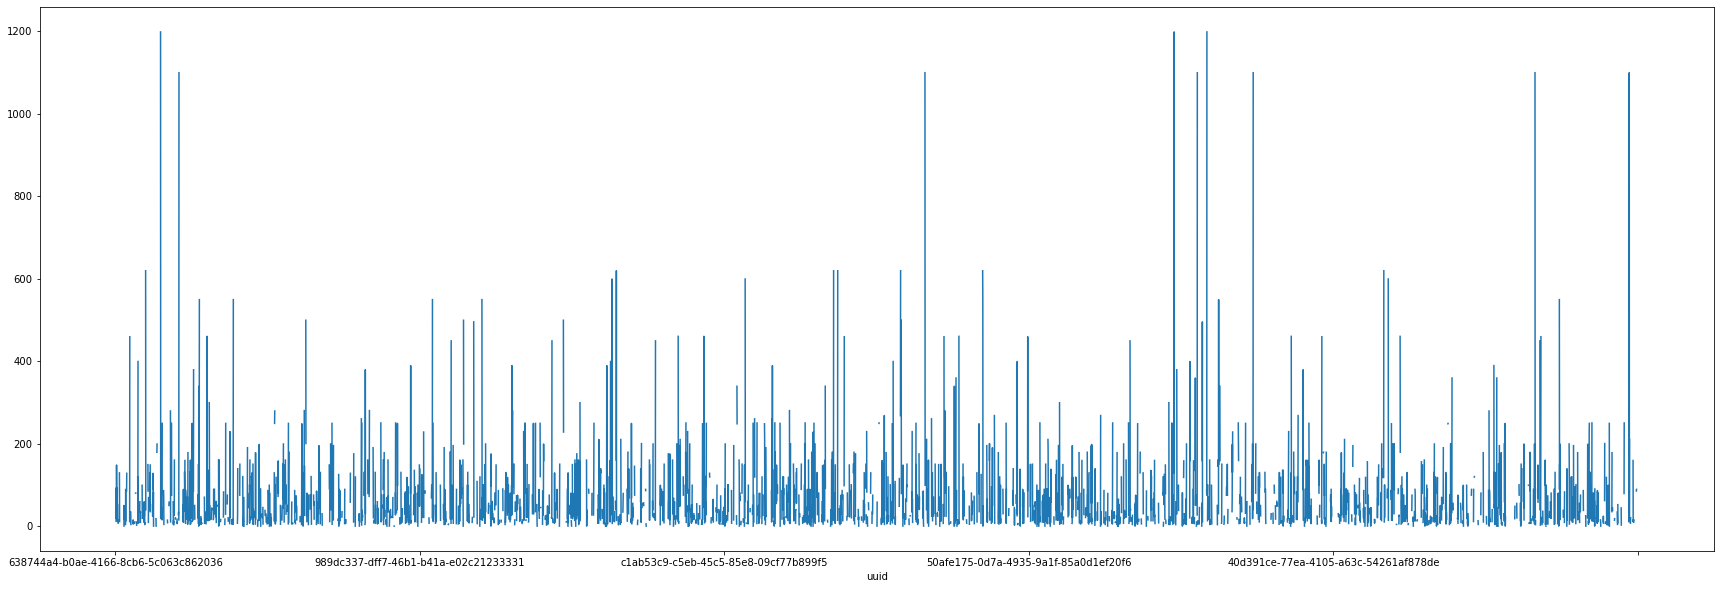

In [84]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.figsize'] = [30,10]
# plt.plot(df_no_doller,c)
df_10000=df_no_doller[:10000]
df_10000.plot(x="price_string", y=c)
plt.show()

# df_pro_type=df[df["category"]==c[0]]






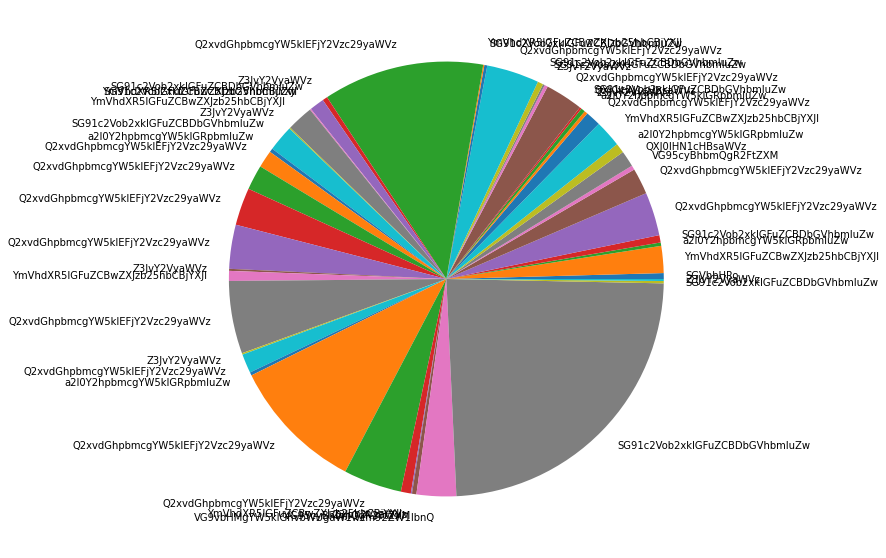

In [61]:
df_price=df[df['price_string'].notna()]
# print(df_price.count()) # null price_string cols
df_price=df_price[:50]
plt.pie(df_price["price_string"].replace( '[\$,)]','', regex=True).replace( '[(]','-',   regex=True ).astype(float), labels = df_price["category"])
plt.show()

In [99]:
# fig, ax = plt.subplots()
# ax.axis('equal')

# patches, texts, autotexts = ax.pie(df_price["price_string"].replace( '[\$,)]','', regex=True).replace( '[(]','-',   regex=True ).astype(float), labels = df_price["category"],
#                               autopct='%1.1f%%', 
#                               pctdistance=0.5, 
#                               labeldistance=1.1)



# # Move a label
# texts[1]._x =-0.5
# texts[1]._y =+0.5

# # E.g. change some formatting
# texts[-1]._color = 'blue'

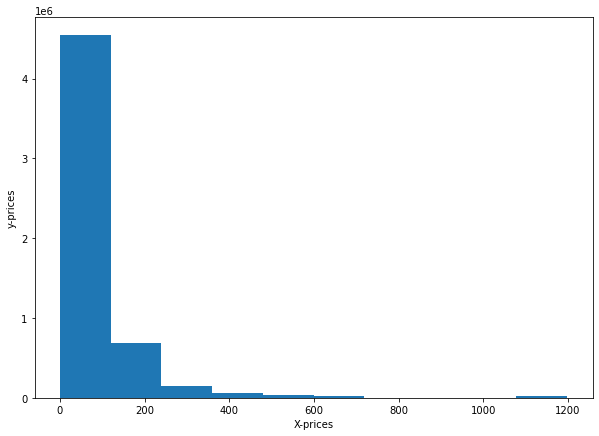

In [63]:
import numpy as np
a = np.array(df_no_doller)
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a)
plt.xlabel("X-prices")
plt.ylabel("y-prices")
# Show plot
plt.show()

<AxesSubplot:>

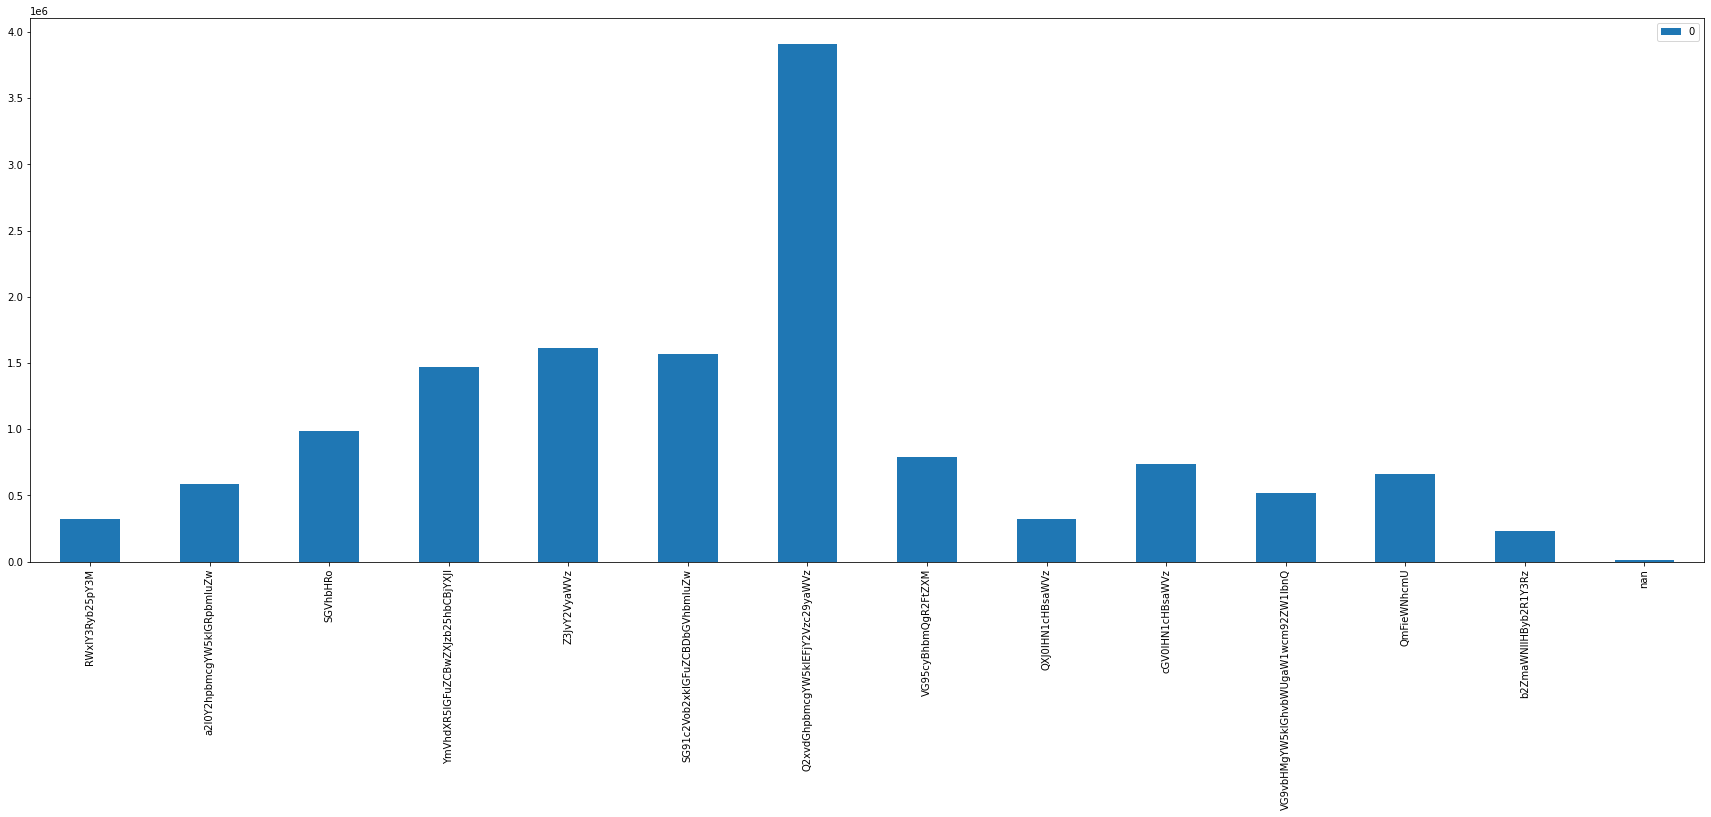

In [64]:
import pandas
from collections import Counter

letter_counts = Counter(df["category"])
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')

<AxesSubplot:>

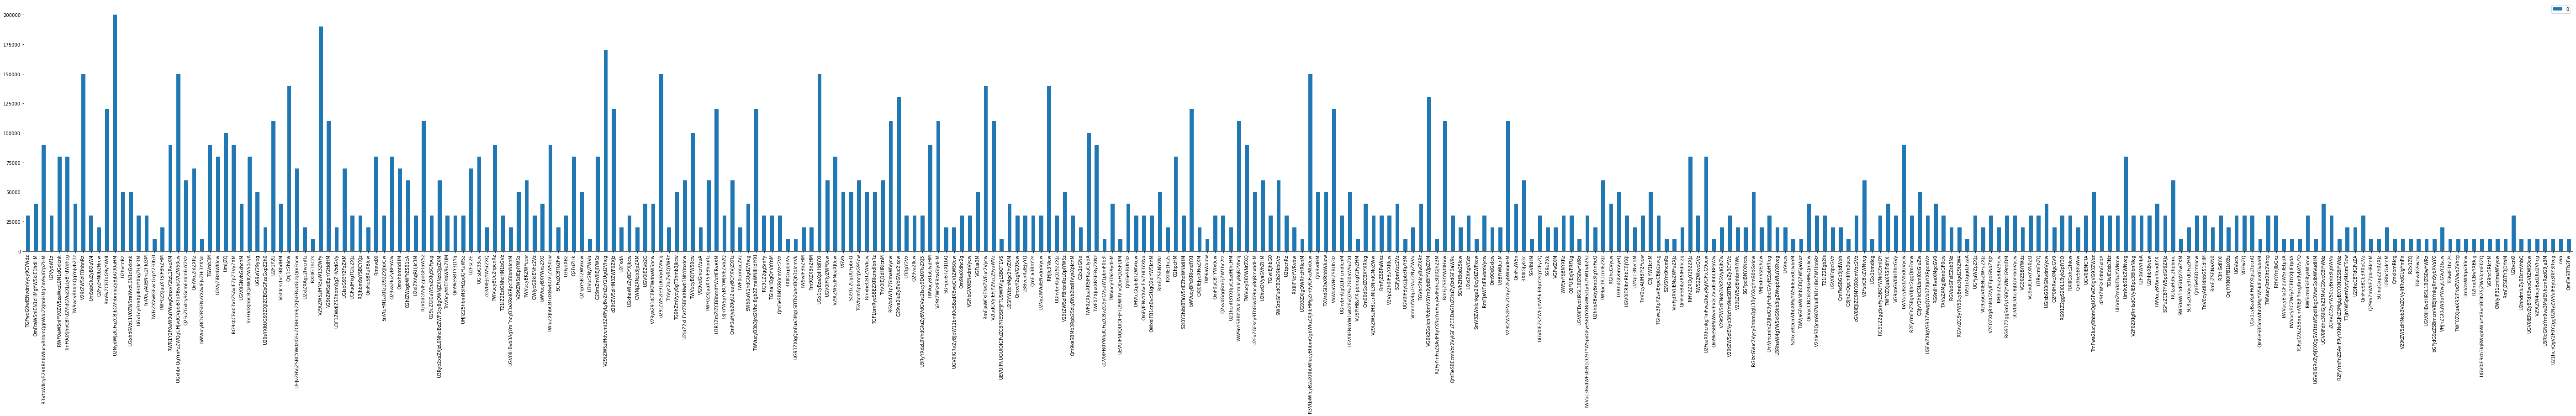

In [95]:
import pandas
from collections import Counter
plt.rcParams['figure.figsize'] = [100,10]
letter_counts = Counter(df["product_type"])
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')


In [100]:

# # Create a figure instance
# fig = plt.figure(1, figsize=(9, 6))

# # Create an axes instance
# ax = fig.add_subplot(111)
# data_to_plot=[df_no_doller.unique()]
# # Create the boxplot
# bp = ax.boxplot(data_to_plot, showfliers=True)

# for flier in bp['fliers']:
#     flier.set(marker='o', color='#e7298a', alpha=0.5)

# plt.show()